# Customer Churn Prediction

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv file

data= pd.read_csv(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Customer Churn/Telecom_customer_churn.csv")

In [3]:
# check the first five sample data 

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check the info of the data dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Since feature TotalCharges is aobject type feature,we will convert it into float

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [6]:
# checking the null values

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Drop all the 11 missing values,

data= data.dropna()

### EDA

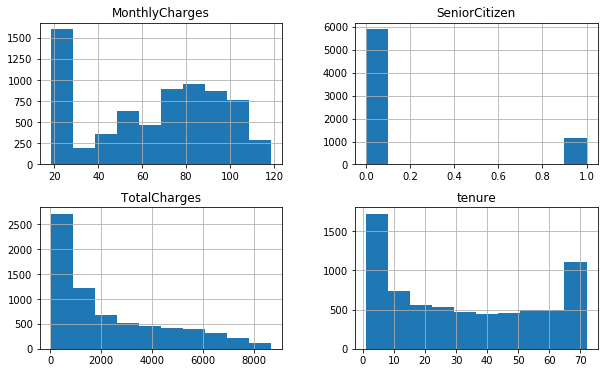

In [8]:
# Univariate Analysis

data.hist(figsize=(10,6))
plt.show()

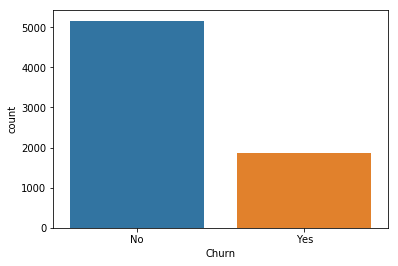

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn',data=data)

In [10]:
a=data.Churn.value_counts()
churn_count=a[1]
not_churn_count=a[0]
churn_count
print(r"The count of customer's churning in the company is %d (%.2f) percent" %(churn_count,((churn_count/(churn_count+not_churn_count)*100))))

The count of customer's churning in the company is 1869 (26.58) percent


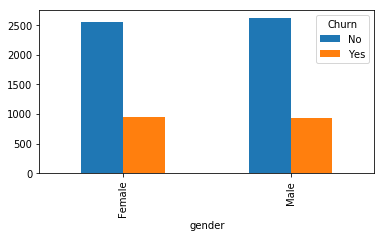

In [11]:
# Bivariate Analysis

pd.crosstab(data.gender,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can observe clearly that gender doesnt influence the cutomers churning.

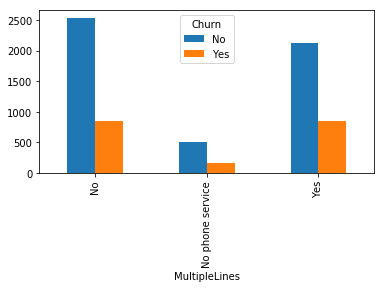

In [12]:
pd.crosstab(data.MultipleLines,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can also say that the MultipleLine features doesnt have that much influence on the customers churning.

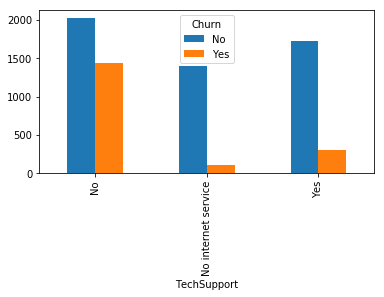

In [13]:
pd.crosstab(data.TechSupport,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can observe clearly that TechSupport plays an important role in the retainment of the customers.

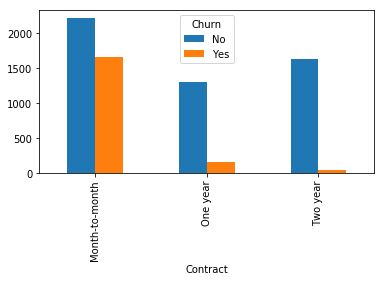

In [14]:
pd.crosstab(data.Contract,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can observe clearly that contract duratio of the customers plays an important role in the customers retainment.

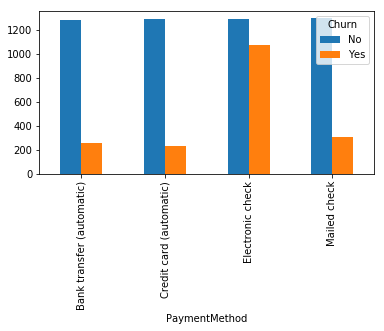

In [15]:
pd.crosstab(data.PaymentMethod,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can observe clearly that payment method also plays an important role in the customers retainment.

Text(0.5, 1.0, 'Tenure vs Churn')

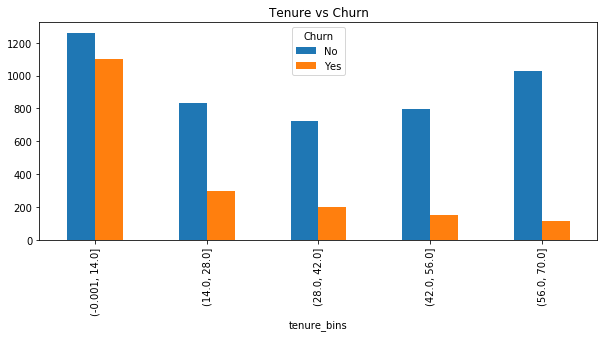

In [16]:
bins=range(0,int(data.tenure.max()),int(int(data['tenure'].max())/5))
data['tenure_bins']=pd.cut(data.tenure,bins=bins,include_lowest = True)
#pd.crosstab(data.policy_annual_premium_bins,data.fraud_reported).plot(kind = 'bar', figsize = (10,6))
pd.crosstab(data.tenure_bins,data.Churn).plot(kind='bar',figsize=(10,4))
plt.title('Tenure vs Churn')

##### By this we can observe clearly that Tenure of the customer with the company plays an important role in the customers retainment.Since here, the tenure of 0-14 months is the high time where customer churns

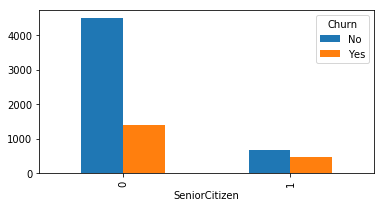

In [17]:
pd.crosstab(data.SeniorCitizen,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can also say that the customer being a Senior citizen doesnt have that much influence on the customers churning.

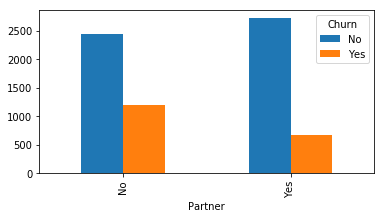

In [18]:
pd.crosstab(data.Partner,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can say that the customers who are single are more likely to stop using the services.

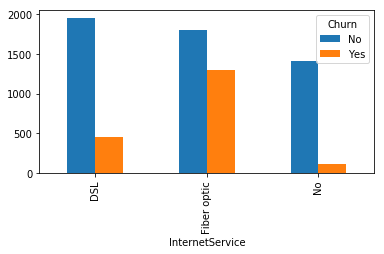

In [19]:
pd.crosstab(data.InternetService,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can also say that the customers who are using the Fiber optic are more likely to stop using the services.

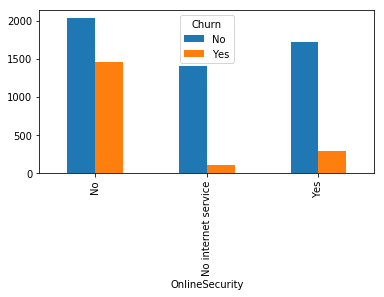

In [20]:
pd.crosstab(data.OnlineSecurity,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can also say that the customers who are not using the Online security are more likely to stop using the services.

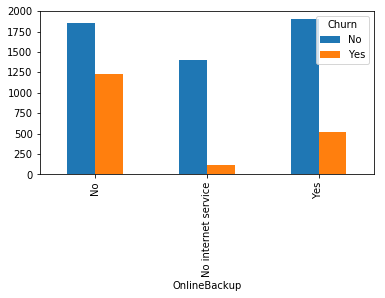

In [21]:
pd.crosstab(data.OnlineBackup,data.Churn).plot(kind='bar',figsize=(6,3))

##### By this we can also say that the customers who are not using the Online Backup are more likely to stop using the services.

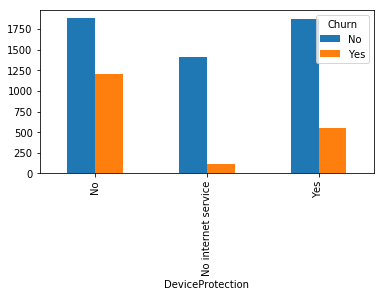

In [22]:
pd.crosstab(data.DeviceProtection,data.Churn).plot(kind='bar',figsize=(6,3))

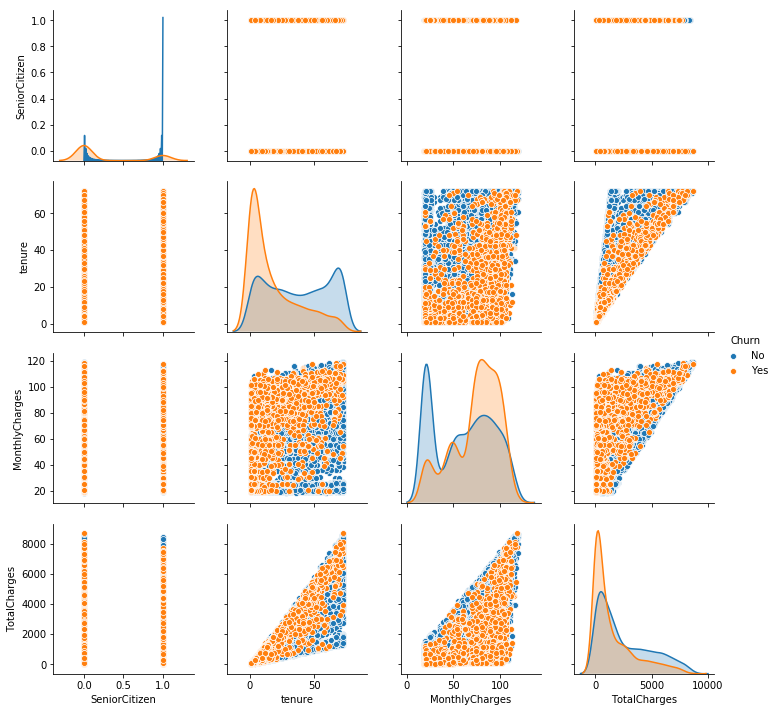

In [23]:
sns.pairplot(hue='Churn',data=data)

##### By this we can also say that the customers who are not using the Device Protection feature are more likely to stop using the services.

### Feature Engineering and Preprocessing

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bins'],
      dtype='object')

In [25]:
#Lets drop the unnecessary features

data.drop(['customerID','gender', 'SeniorCitizen','MultipleLines','StreamingTV', 
           'StreamingMovies','tenure_bins'],axis=1, inplace=True)

In [26]:
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','PaperlessBilling','Churn'):
    data[col] = [1 if x == "Yes" else 0 for x in data[col]]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
InternetService     7032 non-null object
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
Contract            7032 non-null object
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


In [28]:
data1 = pd.get_dummies(data[['InternetService','Contract','PaymentMethod']])

In [29]:
data.drop(['InternetService','Contract','PaymentMethod'],axis=1, inplace=True)

In [30]:
data_final = pd.concat([data, data1], axis=1)

In [31]:
data_final.head()

,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,1,29.85,...,1,0,0,1,0,0,0,0,1,0
1,0,0,34,1,1,0,1,0,0,56.95,...,1,0,0,0,1,0,0,0,0,1
2,0,0,2,1,1,1,0,0,1,53.85,...,1,0,0,1,0,0,0,0,0,1
3,0,0,45,0,1,0,1,1,0,42.30,...,1,0,0,0,1,0,1,0,0,0
4,0,0,2,1,0,0,0,0,1,70.70,...,0,1,0,1,0,0,0,0,1,0


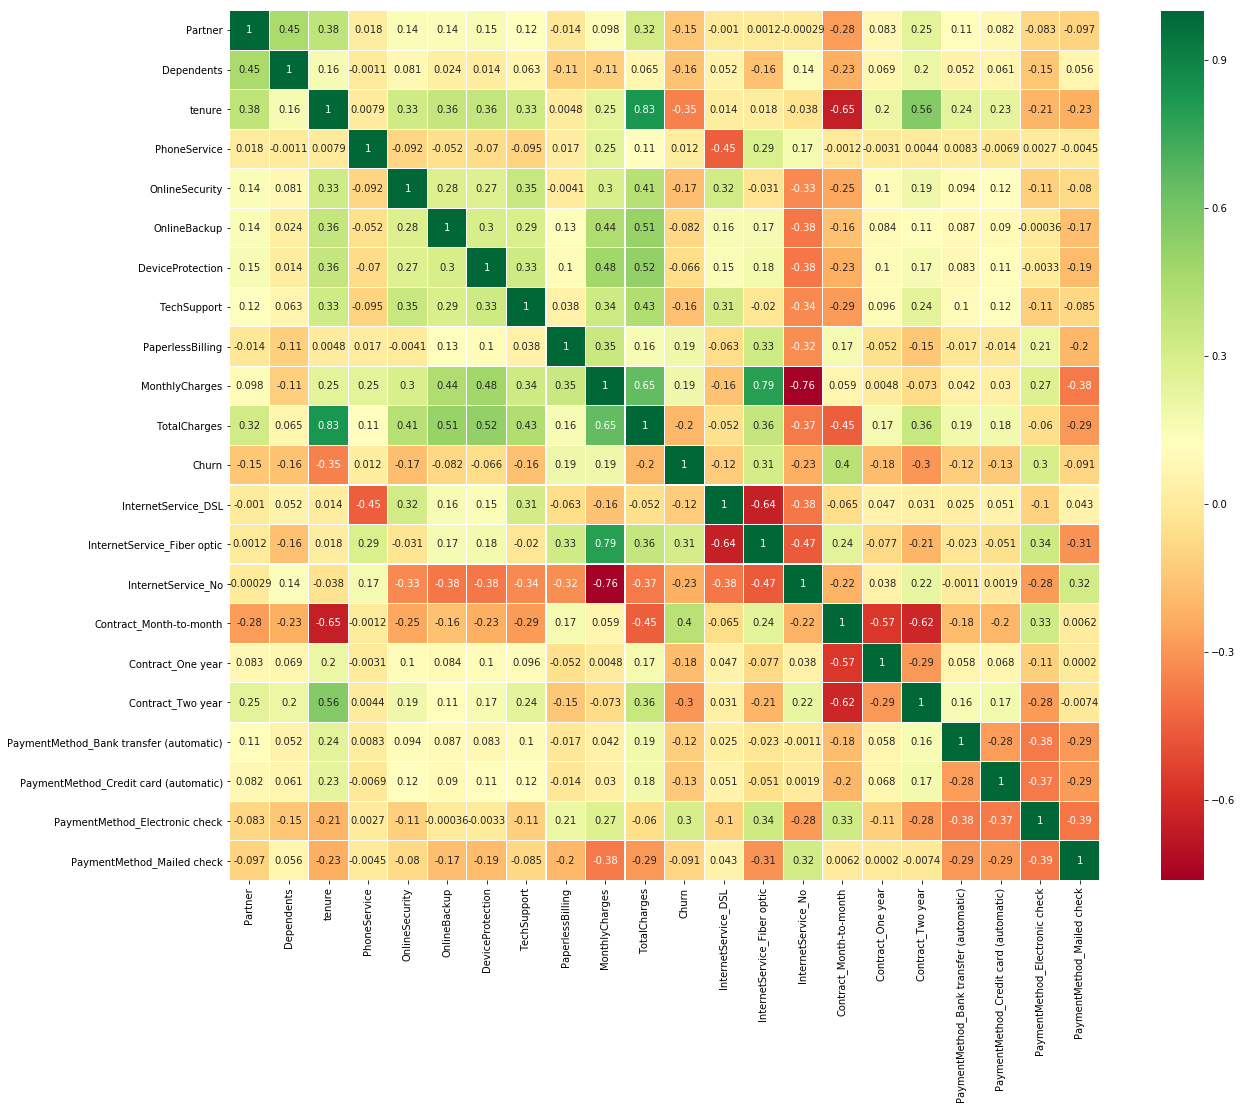

In [32]:
#check the correlation

plt.figure(figsize=(22,16))
sns.heatmap(data_final.corr(),cmap='RdYlGn',linewidths=0.1,linecolor='w',annot=True,square=True)

In [33]:
# Segregate the target and features

y = data_final['Churn']
X = data_final.drop(labels=['Churn'],axis=1)

X.shape

(7032, 21)

In [34]:
# Segregate the data set into train and test set

from sklearn.model_selection import train_test_split,KFold, cross_val_score

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

## Implementing all the models

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [36]:
# appending all the models in a list

models = []
results = []
names = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=22)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=22, p=2,
             weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('RFC',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              m

In [37]:
# Fitting all the models on the training set

for name,model in models:
    k_fold = KFold(n_splits=10,random_state=42)
    cv_score = cross_val_score(model,train_X,y=train_y,scoring='accuracy',cv=k_fold)
    results.append(cv_score)
    names.append(name)
    print('%s %.2f (%.2f)' % (name,(cv_score.mean()*100),(cv_score.std()*100)))

LR 80.45 (2.15)
KNN 78.22 (2.19)
DT 73.51 (1.70)
NB 74.52 (1.79)
RFC 77.96 (1.49)
SVM 76.94 (2.06)


In [38]:
#Since Logistic Regression is the best fitted model

lr = LogisticRegression()
lr.fit(train_X,train_y)

lr_predicted = lr.predict(test_X)

#checking the accuracy of the model on the test data

lr_score = accuracy_score(test_y,lr_predicted)
print('Accuracy of the model : %.2f' % (lr_score*100))

print('Classifiction report :')
print(classification_report(test_y,lr_predicted))

print('confusion matrix :')
print(confusion_matrix(test_y,lr_predicted))

Accuracy of the model : 79.76
Classifiction report :
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110

confusion matrix :
[[1383  166]
 [ 261  300]]
